In [4]:
#enveloping potential
# simple Example plot Enveloped Potential with two Harmonic Oscilators
##Imports:
import os, sys, numpy as np
sys.path.append(os.getcwd()+"/../../..")

import ensembler.potentials.TwoD as pot2D
import ensembler.visualisation.plotPotentials as exPlot

point_resolution = 120 # if you want to save time use: 120
%matplotlib inline

# BUILD POTENTIAL

Here we define the two states, we want to use during our simulations.

In [5]:
# Settings
barrier = 50 #kT - minimal barrier in system
amplitude = barrier/2
shift  = np.rad2deg(0.5*np.pi)

#System States
V1 = pot2D.wavePotential(phase_shift=(shift,shift), multiplicity=(2.0, 2.0), amplitude=(amplitude, amplitude))
V2 = pot2D.wavePotential(phase_shift=(0.0, 0.0), multiplicity=(2.0, 2.0), amplitude=(amplitude, amplitude))



180 180


ValueError: not enough values to unpack (expected 3, got 2)

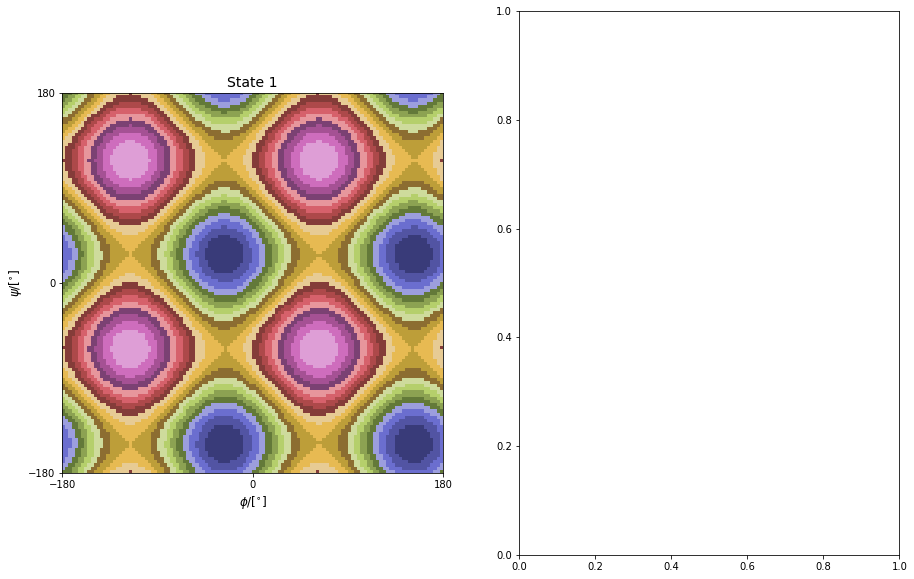

In [6]:
#Visualisation
fig = exPlot.plot_2D_2states(V1, V2, space_range=[(-180,180), (-180,180)], point_resolution=point_resolution)
fig.show()


Next we are going to couple them in an EDS potential.

In [ ]:
Eoff = [0,0]
s= 1.0
edsPot = pot2D.envelopedPotential(V_is=[V1, V2], s=s, Eoff_i=Eoff)
print(edsPot)


In [ ]:
fig = exPlot.plot_2D_2State_EDS_potential(eds_pot=edsPot, point_resolution=point_resolution)
fig.show()


In [ ]:
In this plot we show, the s dependency.

In [ ]:
fig = exPlot.plot_2D_2State_EDS_potential(eds_pot=edsPot, s=0.025, point_resolution=point_resolution)
fig.show()

# smoothing parameter dependency
Next we want to show how  the EDS Potentials are behaving on changing the smoothing parameter s.

In [ ]:
s_values = {np.round(s,3):[] for s in np.logspace(1,-3, 10)}
fig = exPlot.plot_2D_2State_EDS_potential_sDependency(sVal_traj_Dict=s_values, eds_pot=edsPot, point_resolution=point_resolution)
fig.show()
